In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Lecture 8. Introduction to Feedforward Neural Networks

### Representation Power of Neural Networks: 1
In these two problems, we are going to explore how a neural network can represent any given binary functions. We will start in this problem by building the logic NAND function using a simple neural network.

The logic NAND function is defined as

 	 𝑦 	 = 	 NOT(𝑥1 AND 𝑥2) 	 	 
where  𝑥1  and  𝑥2∈{0,1}  are binary inputs (and  1  denotes  True  and  0  denotes  False ).

In [2]:
X = np.array([[True, True],
              [True, False],
              [False, True],
              [False, False]])

In [12]:
def hidden_1(x):
    W1=np.array([-1,-1])
    W1_0 = 2
    return ((x@W1)+W1_0)>0

In [25]:
# form a NAND funtion
for x in X:
#     print('input\n=', x)
#     print('input layer\n=', x)
    output = hidden_1(x)
#     print('output\n=', output)
    print('output = NAND?\n', output == (not (x[0] and x[1])))
    print('---')

output = NAND?
 True
---
output = NAND?
 True
---
output = NAND?
 True
---
output = NAND?
 True
---


### Representation Power of Neural Networks: 2
- logic funtions

In [17]:
def hidden_2(x):
    W2=np.array([1,1])
    W2_0 = 0
    return ((x@W2)+W2_0)<=1

In [26]:
# form a AND funtion
for x in X:
#     print('input\n=', x)
#     print('input layer\n=', x)
    Z1 = np.array([hidden_1(x), hidden_1(x)])
#     print('NN Hidden layer 1\n=',Z1)
    output = hidden_2(Z1)
#     print('NN output\n=', output)
    print('output = AND?\n', output == ((x[0] and x[1])))
    print('---')
# print('This is a AND function (input layer to output)')

output = AND?
 True
---
output = AND?
 True
---
output = AND?
 True
---
output = AND?
 True
---


In [27]:
# other structure 1
# output = [x1,x1]@hidden_2
for x in X:
#     print('input\n=', x)
    inputlayer = np.array([x[0],x[0]])
#     print('input layer\n=', inputlayer)
    output = hidden_2(inputlayer)
#     print('output\n=', output)
    print('output = not x1?\n', output == (not x[0]))
    print('---')
print('This is a NOT function of x1 (input to output)')

output = not x1?
 True
---
output = not x1?
 True
---
output = not x1?
 True
---
output = not x1?
 True
---
This is a NOT function of x1 (input to output)


In [28]:
# other structure 2
# output = [[x1,x1]@hidden_1, [x2,x2]@hidden_1]@hidden_1]@hidden_2
for x in X:
#     print('input\n=', x)
    inputlayer = np.array([[x[0],x[0]], [x[1],x[1]]])
#     print('input layer\n=', inputlayer)
    Z1 = np.array([hidden_1(inputlayer[0]), hidden_1(inputlayer[1])])
#     print('NN Hidden layer 1(NAND)\n=',Z1)
    output = hidden_2(Z1)
#     print('output\n=', output)
    print('output = x1 or x2?\n', output == (x[0] or x[1]))
    print('---')
print('This is a OR function of (x1,x2) (input to output)')

output = x1 or x2?
 True
---
output = x1 or x2?
 True
---
output = x1 or x2?
 True
---
output = x1 or x2?
 True
---
This is a OR function of (x1,x2) (input to output)


### Linear Separability After First Layer
Let  𝑓(𝑖)1,𝑓(𝑖)2  denote the output of the two units in the hidden layer corresponding to the input  𝑥(𝑖)  respectively, i.e.

 	 𝑓(𝑖)1 	 = 	 𝑓(𝑤01+(𝑤11𝑥(𝑖)1+𝑤21𝑥(𝑖)2)) 	 	 
 	 𝑓(𝑖)2 	 = 	 𝑓(𝑤02+(𝑤12𝑥(𝑖)1+𝑤22𝑥(𝑖)2)) 	 	 
Consider the set  𝐷′={([𝑓(𝑖)1,𝑓(𝑖)2],𝑦(𝑖)),𝑖=1,2,3,4} .
Assume that f is the linear activation function given by  𝑓(𝑧)=2𝑧−3 .

For which of the following values of weights would the set  𝐷′  be linearly separable? (Select all that apply.)

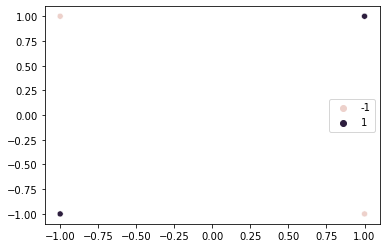

In [32]:
X = np.array([[1,1],
              [-1,-1],
              [1,-1],
              [-1,1]])
Y = np.array([1,1,-1,-1])
sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y)
plt.show()

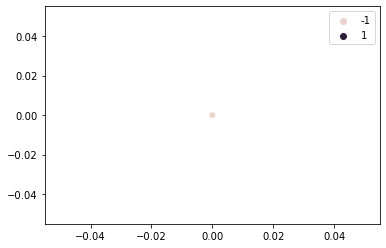

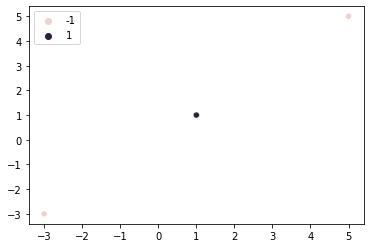

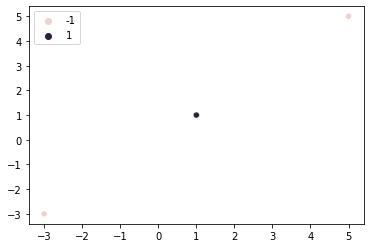

In [43]:
W_0 = np.zeros((2,2))
W_1 = np.array([[2,2],[-2,-2]])
W_2 = np.array([[-2,-2],[2,2]])
Ws = [W_0, W_1, W_2]
w0 = [0,1,1]
for i in range(3):
    Z = X@Ws[i] + w0[i]
    sns.scatterplot(x=Z[:,0], y=Z[:,1], hue=Y)
    plt.show()


### Non-linear Activation Functions
Again, let's focus on a network with one hidden layer with two units and use the same training set as above. The weights of the network are given as follows:

 	 𝑤11=1,𝑤21=−1,𝑤01=1 	 	 
 	 𝑤12=−1,𝑤22=1,𝑤02=1 	 	 
Let  𝑓1,𝑓2  be the outputs of the first and second unit respectively.

Consider the set  𝐷′={([𝑓(𝑖)1,𝑓(𝑖)2],𝑦(𝑖)),𝑖=1,2,3,4} 

For which of the following functions  𝑓 , would the set  𝐷′  be linearly separable? (Select one or more that apply.)
1. 5z-2
2. relu(z)
3. tanh(z)
4. z

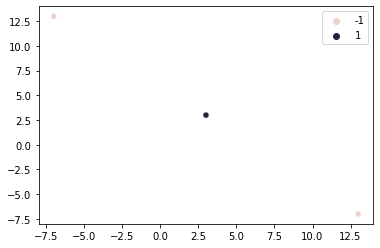

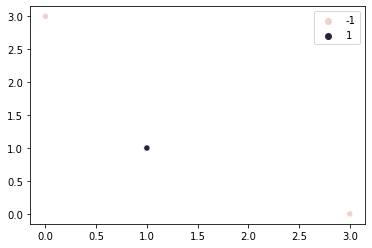

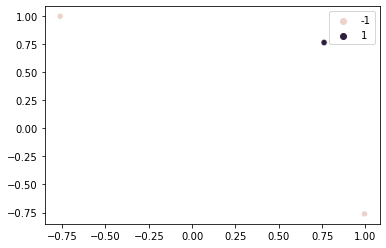

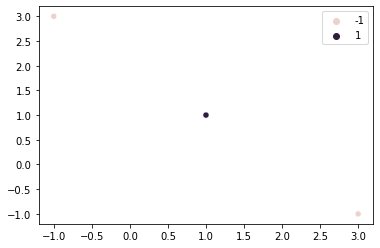

In [64]:
W = np.array([[1,-1],[-1,1]])
w0 = 1
activation_fs = [lambda z: 5*z-2,
               lambda z: np.maximum(0,z),
               lambda z: 1-(2/(np.exp(2*z)+1)),
               lambda z:z]
for af in activation_fs:
    Z = af(X@W+w0)
    sns.scatterplot(x=Z[:,0], y=Z[:,1], hue=Y)
    plt.show()



In [62]:
np.maximum(0,[-1,2])

array([0, 2])

### Neural Network Learned parameters
Given a neural network with one hidden layer for classification, we can view the hidden layer as a feature representation, and the output layer as a classifier using the learned feature representation.

There're also other parameters that will affect the learning process and the performance of the model, such as the learning rate and parameters that control the network architecture (e.g. number of hidden units/layers) etc. These are often called hyper-parameters.

Which of the following is/are optimized during a single training pass? (Note that cross-validation is tuned before this point.) Check all that apply.
1. The dimension of the feature representation
2. The weights that control the feature representation
3. The hyper-parameters
4. The weights for the classifier

ans: 2,4

## Lecture 9. Feedforward Neural Networks, Back Propagation, and Stochastic Gradient Descent (SGD)

In [68]:
1*np.nan

nan